In [1]:
#based on raspberry pi graphing the weather project
%matplotlib inline

from requests import get
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime
import pandas as pd

In [2]:
#URL to pick a weather station
#https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallstations
#Londonderry, Harrisburg, PA

In [3]:
url='https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallmeasurements/595229'
weather=get(url).json()
data=weather['items']
pages=1

In [4]:
#fetch a month of data by pulling nine pages of 500 records
while 'next' in weather and pages<9:
    url=weather['next']['$ref']
    print('Fetching {0}'.format(url))
    weather=get(url).json()
    data+=weather['items']
    pages+=1

Fetching https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallmeasurements/595229?page=1
Fetching https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallmeasurements/595229?page=2
Fetching https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallmeasurements/595229?page=3
Fetching https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallmeasurements/595229?page=4
Fetching https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallmeasurements/595229?page=5
Fetching https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallmeasurements/595229?page=6
Fetching https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallmeasurements/595229?page=7
Fetching https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallmeasurements/595229?page=8


In [5]:
data=data[::-1]

In [6]:
#use list comprehension to create temperature list
temperatures=[(record['ground_temp']*9/5+32) for record in data]
humidity=[record['humidity'] for record in data]

In [7]:
#create timestamp list.  use parse method to convert to datetime object.
#code to display day and abbreviated month: .strftime("%d %b")
timestamps=[parser.parse(record['reading_timestamp']) for record in data]


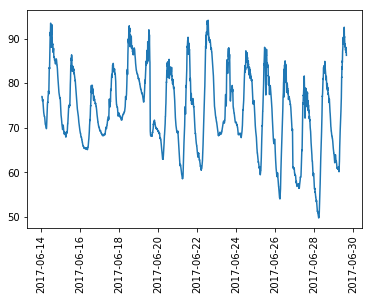

In [8]:
plt.plot(timestamps,temperatures)
plt.xticks(rotation=90)
plt.show()

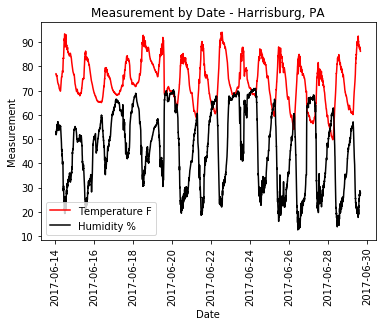

In [9]:
plt.plot(timestamps,temperatures,c='red')
plt.plot(timestamps,humidity,c='black')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Measurement')
plt.title('Measurement by Date - Harrisburg, PA')
plt.legend(['Temperature F','Humidity %'])
plt.show()

In [10]:
data_df=pd.DataFrame(data)
data_df['ambient_temp_F']=temperatures

In [11]:
data_df.head()

,air_pressure,air_quality,ambient_temp,created_by,created_on,ground_temp,humidity,id,rainfall,reading_timestamp,updated_by,updated_on,weather_stn_id,wind_direction,wind_gust_speed,wind_speed,ambient_temp_F
0,994.43,68.33,29.49,Weather@Londonderry,2017-06-14T01:00:01Z,25.00,52.82,4333175,0.0,2017-06-14T01:00:01Z,Weather@Londonderry,2017-06-14T06:00:05.558Z,595229,180.0,0,0,77.000
1,994.42,68.41,29.46,Weather@Londonderry,2017-06-14T01:05:01Z,25.00,51.81,4333190,0.0,2017-06-14T01:05:01Z,Weather@Londonderry,2017-06-14T06:00:05.793Z,595229,180.0,0,0,77.000
2,994.50,68.42,29.37,Weather@Londonderry,2017-06-14T01:10:01Z,24.88,53.10,4333201,0.0,2017-06-14T01:10:01Z,Weather@Londonderry,2017-06-14T06:00:06.026Z,595229,180.0,0,0,76.784
3,994.51,68.58,29.31,Weather@Londonderry,2017-06-14T01:15:01Z,24.81,53.12,4333211,0.0,2017-06-14T01:15:01Z,Weather@Londonderry,2017-06-14T06:00:06.256Z,595229,180.0,0,0,76.658
4,994.29,68.69,29.23,Weather@Londonderry,2017-06-14T01:20:01Z,24.69,52.66,4333225,0.0,2017-06-14T01:20:01Z,Weather@Londonderry,2017-06-14T06:00:06.486Z,595229,180.0,0,0,76.442


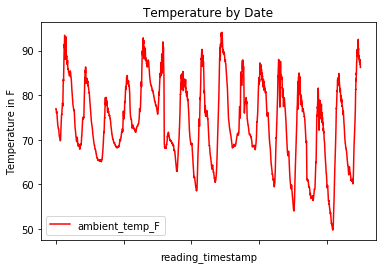

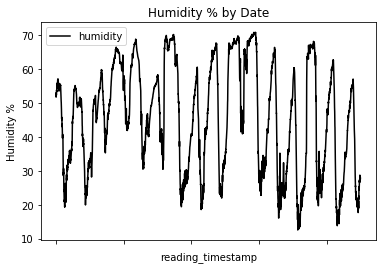

In [12]:
ax1=data_df.plot(x='reading_timestamp',y='ambient_temp_F',c='red',title='Temperature by Date')
ax1.set_ylabel('Temperature in F')
ax2=data_df.plot(x='reading_timestamp',y='humidity',c='black',title='Humidity % by Date')
ax2.set_ylabel('Humidity %')

plt.show()